In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [104]:
1e3

1000.0

In [105]:
df = pd.read_csv('./water_usage.csv')
df.drop(['unit'], axis=1, inplace=True)
df.head()
A = np.sum(df['Total'])/1e3
lamb = 0.1

df_elec = pd.read_csv('./elec_usage.csv')
B = np.sum(df_elec['Elec Consumption(in billion kwh)'])


In [106]:
elec = eval("""[3933.683204
3577.119783
3566.349395
3335.213361
3299.099057
3468.3302
3401.3622
3840.8015
3614.9732
3581.9664
3591.23499
3481.2981
3179.3055
3180.7328
3577.755
3707.779
3638.8383
3603.821
3466.0974
3155.0505
2729.5634]""".replace('\n', ', '))


water = eval("""[19205972
15789278
12528080
9947324
10551848
11843066
11984066
13053619
14510100
14713748
15623871
14747787
11365805
11211927
11907776
12231654
13506530
12181562
11563633
11774078
8173542]""".replace('\n', ', '))
### convert elec and level to np array
elec, water = np.array(water), np.array(water)
elec = elec / 1e2
water = water * 325846.885 / 1e9
print(water)

[6258.2061496  5144.8870527  4082.23584303 3241.30453949 3438.28680179
 3859.02616495 3904.97057573 4253.48108913 4728.07088604 4794.42895247
 5090.98969699 4805.52045459 3703.51215477 3653.3714878  3880.11171688
 3985.6463543  4401.06072766 3969.32403213 3767.97379233 3836.54664005
 2663.32320012]


/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_72339/1994109502.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(df['water'][:,np.newaxis], df['elec'][:,np.newaxis])


LinearRegression()

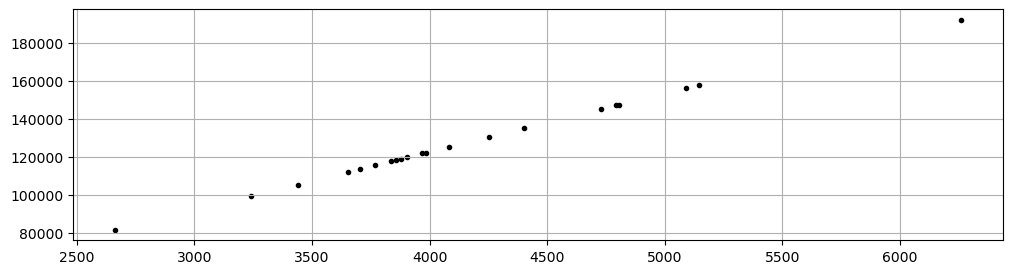

In [107]:
df = pd.DataFrame(elec, columns=['elec'])
df['water'] = water
fig = plt.figure(figsize =(12,3))
plt.scatter(df['water'],df['elec'],marker = '.',color = 'k')
plt.grid(True)
# elec = a * level + b
model = linear_model.LinearRegression()
model.fit(df['water'][:,np.newaxis], df['elec'][:,np.newaxis])

In [108]:
print('slope: %.4f' % model.coef_[0])
print('intercept: %.4f' % model.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %
      (model.coef_[0], model.intercept_))

slope: 30.6893
intercept: -0.0000
The linear regression function: y = 30.6893x + -0.0000


In [109]:
### here mu is the slope
mu = model.coef_[0]
### K = B/mu
K = B / mu


In [110]:
print("All the parameters are:")
print("A = ", A, "with the unit of billion gallons")
print("B = ", B, "with the unit of billion kwh")
print("lambda = ", lamb)
print("K = ", K, "with the unit of billion gallons")
print("mu = ", mu)

All the parameters are:
A =  44.26947 with the unit of billion gallons
B =  1191.00234464 with the unit of billion kwh
lambda =  0.1
K =  [38.8084404] with the unit of billion gallons
mu =  [30.68926069]
